# AFN on correlated random time series

The AFN algorithm is not impervious to correlated stochastic data.
Here we use a time series coming from an AR(1) process and see that the
E2(d) curve has a nontrivial appearance, falsely giving the appearance
of determinism.
Two points are to be noted:
1. Although the E2(d) curves have a nontrivial appearance, they are
   different from the curves seen for deterministic data.  Here the
   value of E2(d) first decreases with d and then increases, whereas
   for deterministic data, E2(d) is seen to increase right from the
   beginning.
2. Imposing a minimum temporal separation equal to the autocorrelation
   time of the series while searching for near neighbors solves the
   problem.

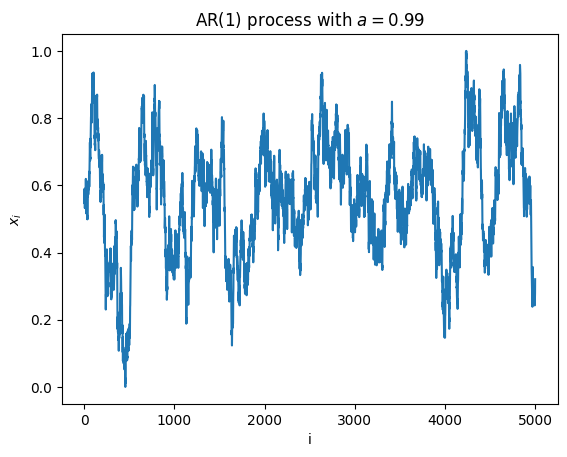

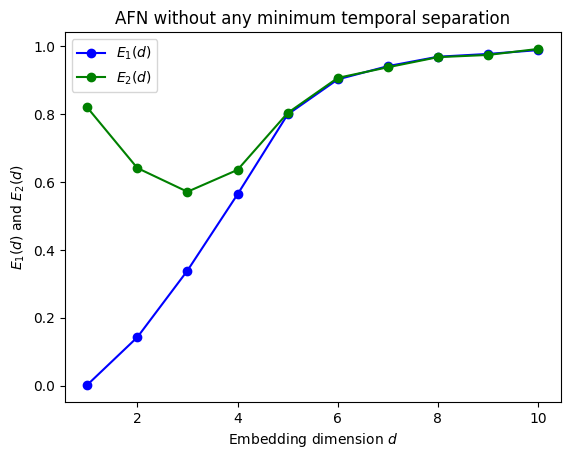

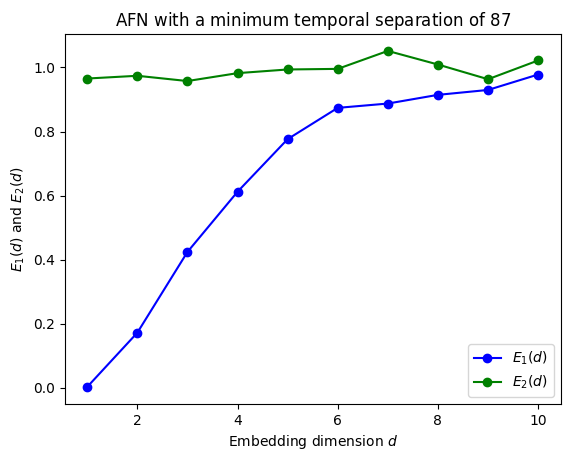

In [1]:
from nolitsa import delay, dimension, utils
import matplotlib.pyplot as plt
import numpy as np

# Generate stochastic data.
N = 5 * 1000
x = np.empty(N)

np.random.seed(999)
eta = np.random.normal(size=(N), loc=0, scale=1.0)
a = 0.99

x[0] = eta[0]
for i in range(1, N):
    x[i] = a * x[i - 1] + eta[i]

x = utils.rescale(x)

# Calculate the autocorrelation time.
tau = np.argmax(delay.acorr(x) < 1.0 / np.e)

# AFN without any minimum temporal separation.
dim = np.arange(1, 10 + 2)
F, Fs = dimension.afn(x, tau=tau, dim=dim, window=0)
F1, F2 = F[1:] / F[:-1], Fs[1:] / Fs[:-1]

# AFN with a minimum temporal separation (equal to the autocorrelation
# time) between near-neighbors.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=tau, dim=dim, window=tau)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.figure(1)
plt.title(r'AR(1) process with $a = 0.99$')
plt.xlabel(r'i')
plt.ylabel(r'$x_i$')
plt.plot(x)

plt.figure(2)
plt.title(r'AFN without any minimum temporal separation')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], F1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], F2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.figure(3)
plt.title(r'AFN with a minimum temporal separation of $%d$' % tau)
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

## AFN for data from the Mackey-Glass delay differential equation.

The minimum embedding dimension comes out to be 5-7 (depending on the initial condition) with both E1 and E2 curves giving very strong hints of determinism.  According to Grassberger & Procaccia (1983) the correlation dimension of the Mackey-Glass system with a delay of 23 is
~ 2.5.  Thus, the results are definitely comparable.

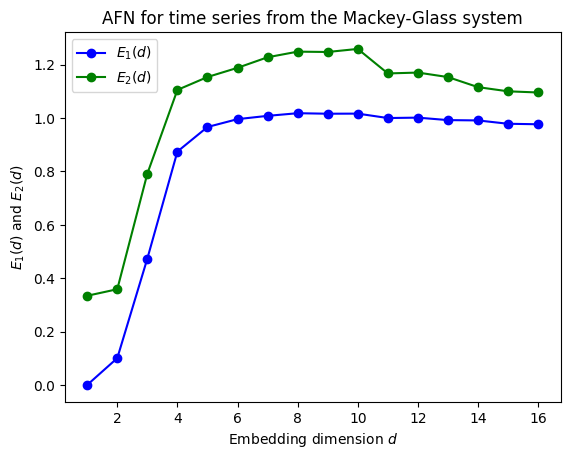

In [3]:
from nolitsa import data

x = data.mackey_glass(tau=23.0, sample=0.46, n=1000)

# Since we're resampling the time series using a sampling step of
# 0.46, the time delay required is 23.0/0.46 = 50.
tau = 50
dim = np.arange(1, 16 + 2)

# AFN algorithm.
E, Es = dimension.afn(x, tau=tau, dim=dim, window=100)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Mackey-Glass system')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

# Maximum Lyapunov exponent of a closed noisy curve.

A trajectory in the form of a closed curve should have a Lyapunov
exponent equal to zero (or the average divergence should not vary with
time).  But our curves for the average divergence appear to be
oscillatory and don't look very flat.  What's wrong?

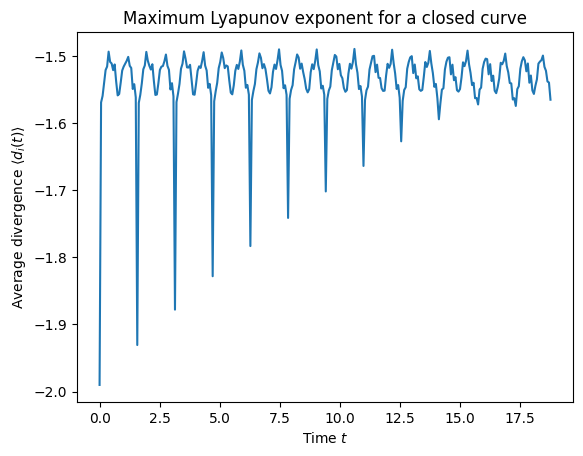

In [4]:
from nolitsa import lyapunov, utils

t = np.linspace(0, 100 * np.pi, 5000)
x = np.sin(t) + np.sin(2 * t) + np.sin(3 * t) + np.sin(5 * t)
x = utils.corrupt(x, np.random.normal(size=5000), snr=1000)

# Time delay.
tau = 25

window = 100

# Embedding dimension.
dim = [10]

d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=300, window=window)[0]

plt.title('Maximum Lyapunov exponent for a closed curve')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(t[:300], d)

plt.show()